# Analysis

## Data Exploration

In [1]:
# load dataset from csv file
# load python modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

def load_data(file_name):

    # Load the wholesale dataset
    dataset_file = file_name
    try:
        data = pd.read_csv(dataset_file, delimiter=",")

        # temporary drop column 'status' due to type string
        status_cl = pd.DataFrame(data['STATUS'], columns = ['STATUS'], dtype=np.str).reset_index(drop=True)
        data = data.drop(['STATUS'], 1)

        # apply rest of columns converting to float type
        data = data.apply(pd.to_numeric, args=('coerce',)).reset_index(drop=True)


        data = pd.concat([data, status_cl], axis=1)
        data = data.reset_index(drop=True)
        print data.dtypes
        print "Wholesale flight dataset has {} samples with {} features each.".format(*data.shape)
    except:
        print "Dataset could not be loaded!"
    return data

learn_data = load_data(r'raw_data.csv').reset_index(drop=True)
test_data = load_data(r'test_data.csv').reset_index(drop=True)
all_data = pd.concat([learn_data, test_data], axis=0).reset_index(drop=True)
print all_data.columns

BAR            float64
MOTOR1           int64
MOTOR2           int64
MOTOR3           int64
MOTOR4           int64
LIDAR          float64
THRUST         float64
ACC_X          float64
ACC_Y          float64
ACC_Z          float64
MAG_Z          float64
GYRO_X         float64
GYRO_Y         float64
GYRO_Z         float64
PITCH          float64
ROLL           float64
YAW            float64
TIME             int64
LOG_ID           int64
LAND_STATUS      int64
STATUS          object
dtype: object
Wholesale flight dataset has 41147 samples with 21 features each.
BAR            float64
MOTOR1           int64
MOTOR2           int64
MOTOR3           int64
MOTOR4           int64
LIDAR          float64
THRUST         float64
ACC_X          float64
ACC_Y          float64
ACC_Z          float64
MAG_Z          float64
GYRO_X         float64
GYRO_Y         float64
GYRO_Z         float64
PITCH          float64
ROLL           float64
YAW            float64
TIME             int64
LOG_ID           int64


In [2]:
# samples of dataset
from IPython.display import display # Allows the use of display() for DataFrames
indices = [1,100, 200, 1073,9999, 32050]
samples = pd.DataFrame(np.round(all_data.loc[indices], 3), columns = all_data.keys()[0:10])
display(samples)
samples = pd.DataFrame(np.round(all_data.loc[indices], 3), columns = all_data.keys()[10:])
display(samples)

,BAR,MOTOR1,MOTOR2,MOTOR3,MOTOR4,LIDAR,THRUST,ACC_X,ACC_Y,ACC_Z
1,1019.44,1298,1298,1298,1298,0.047,0.000,-0.906,0.055,-9.837
100,1019.29,1517,1624,1507,1531,0.298,0.686,-0.116,-0.083,-13.008
200,1018.91,1437,1486,1445,1466,3.263,0.521,0.334,-0.291,-9.822
1073,1019.23,1425,1515,1396,1481,0.495,0.512,-0.498,-0.075,-10.002
9999,1019.35,1513,1616,1509,1572,0.177,0.622,-0.233,-0.001,-12.335
32050,1012.42,1535,1525,1461,1462,3.150,0.546,0.091,0.199,-8.652


,MAG_Z,GYRO_X,GYRO_Y,GYRO_Z,PITCH,ROLL,YAW,TIME,LOG_ID,LAND_STATUS,STATUS
1,0.489,0.015,0.027,-0.003,-0.081,0.016,2.633,64927667,0,0,take_off
100,0.457,-0.221,0.003,-0.055,0.083,-0.015,2.614,66566750,0,0,take_off
200,0.483,-0.008,0.057,-0.003,0.001,0.033,2.628,68336653,0,0,take_off
1073,0.474,0.039,0.024,-0.035,-0.056,0.021,-1.934,84077889,0,1,land
9999,0.463,-0.156,-0.133,-0.032,0.090,-0.011,3.000,42166481,5,0,take_off
32050,0.498,0.016,0.054,-0.022,0.002,-0.031,-1.020,550829712,10,0,flight


In [3]:
display(all_data[all_data.keys()[0:11]].describe().round(3))

,BAR,MOTOR1,MOTOR2,MOTOR3,MOTOR4,LIDAR,THRUST,ACC_X,ACC_Y,ACC_Z,MAG_Z
count,88084.000,88084.000,88084.000,88084.000,88084.000,88084.000,88084.000,88084.000,88084.000,88084.000,88084.000
mean,1014.537,1466.298,1510.502,1441.252,1476.070,5.890,0.537,-0.064,-0.064,-9.802,0.482
std,2.757,97.355,100.373,99.777,99.054,8.340,0.105,0.659,0.528,1.357,0.021
min,1009.240,910.000,910.000,910.000,910.000,0.000,0.000,-20.925,-7.646,-47.693,-0.519
25%,1012.170,1434.000,1480.000,1406.000,1445.000,0.059,0.509,-0.378,-0.361,-10.153,0.472
50%,1013.980,1477.000,1517.000,1450.000,1483.000,4.887,0.546,-0.057,-0.097,-9.775,0.484
75%,1017.410,1514.000,1559.000,1492.000,1526.000,7.956,0.585,0.235,0.191,-9.383,0.494
max,1019.680,1879.000,1879.000,1819.000,1878.000,65.324,1.000,16.850,15.148,9.816,0.561


In [4]:
display(all_data[all_data.keys()[11:]].describe().round(3))

,GYRO_X,GYRO_Y,GYRO_Z,PITCH,ROLL,YAW,TIME,LOG_ID,LAND_STATUS
count,88084.000,88084.000,88084.000,88084.000,88084.000,88084.000,8.808400e+04,88084.000,88084.000
mean,-0.002,0.000,-0.006,-0.012,0.007,-0.212,2.253052e+08,13.414,0.013
std,0.151,0.230,0.207,0.095,0.066,2.124,2.585364e+08,6.671,0.115
min,-4.609,-4.209,-2.315,-1.424,-1.412,-3.141,3.682341e+07,0.000,0.000
25%,-0.054,-0.058,-0.034,-0.048,-0.019,-2.549,7.800245e+07,8.000,0.000
50%,-0.001,0.001,0.000,-0.008,0.010,-0.136,1.295035e+08,15.000,0.000
75%,0.048,0.058,0.034,0.028,0.040,1.643,2.569603e+08,18.000,0.000
max,2.270,5.734,1.986,0.772,3.120,3.142,1.633813e+09,24.000,1.000


## Data visualization

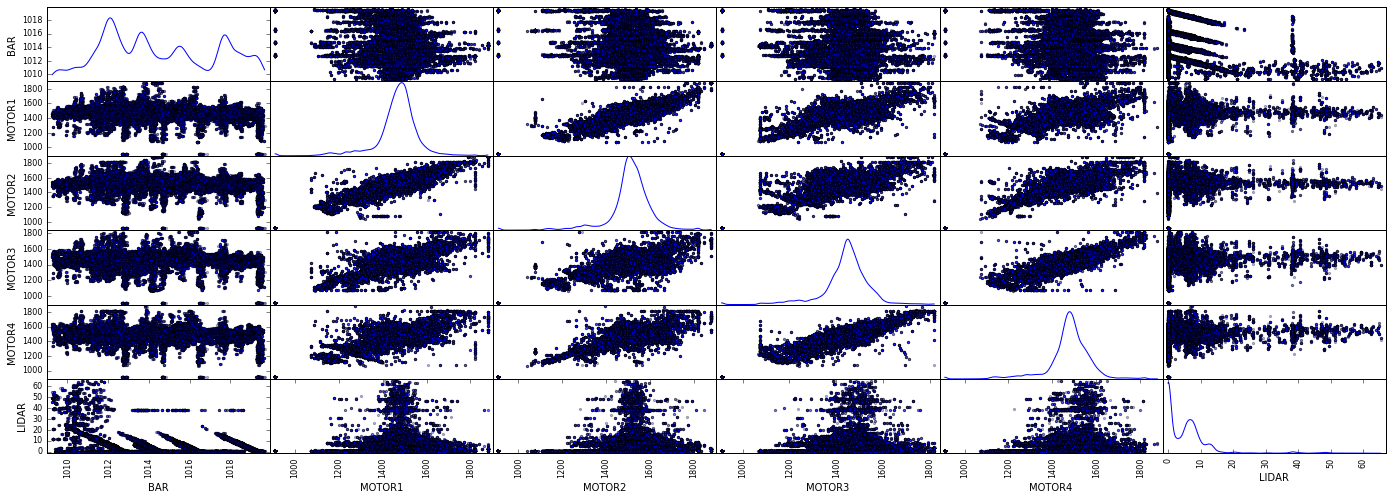

In [9]:
pd.scatter_matrix(all_data[all_data.keys()[0:6]], alpha = 0.3, figsize = (24,8), diagonal = 'kde');

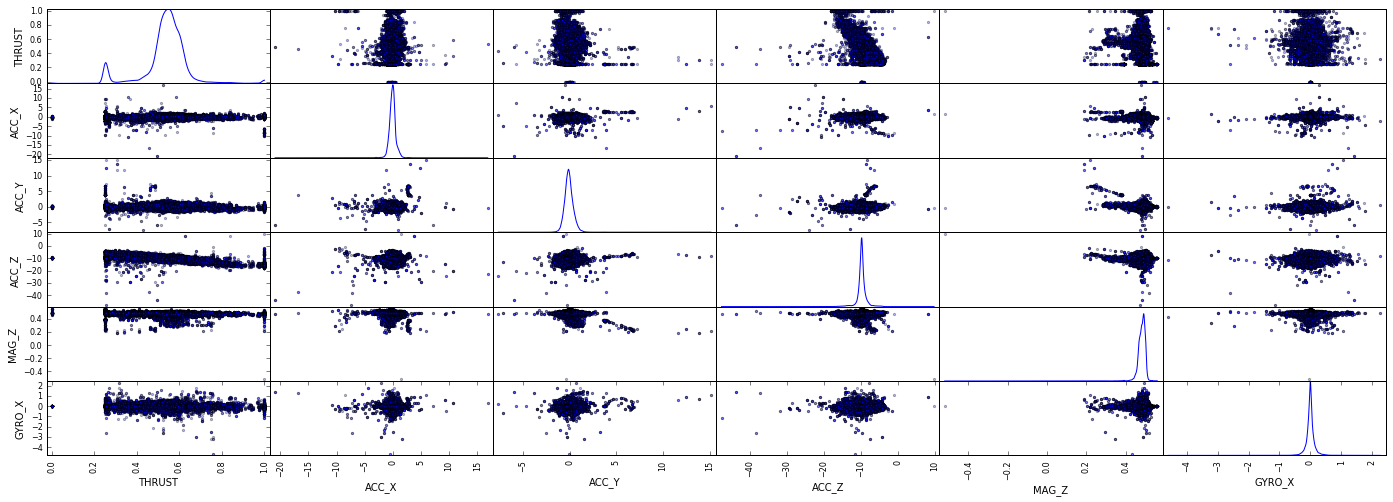

In [10]:
pd.scatter_matrix(all_data[all_data.keys()[6:12]], alpha = 0.3, figsize = (24,8), diagonal = 'kde');

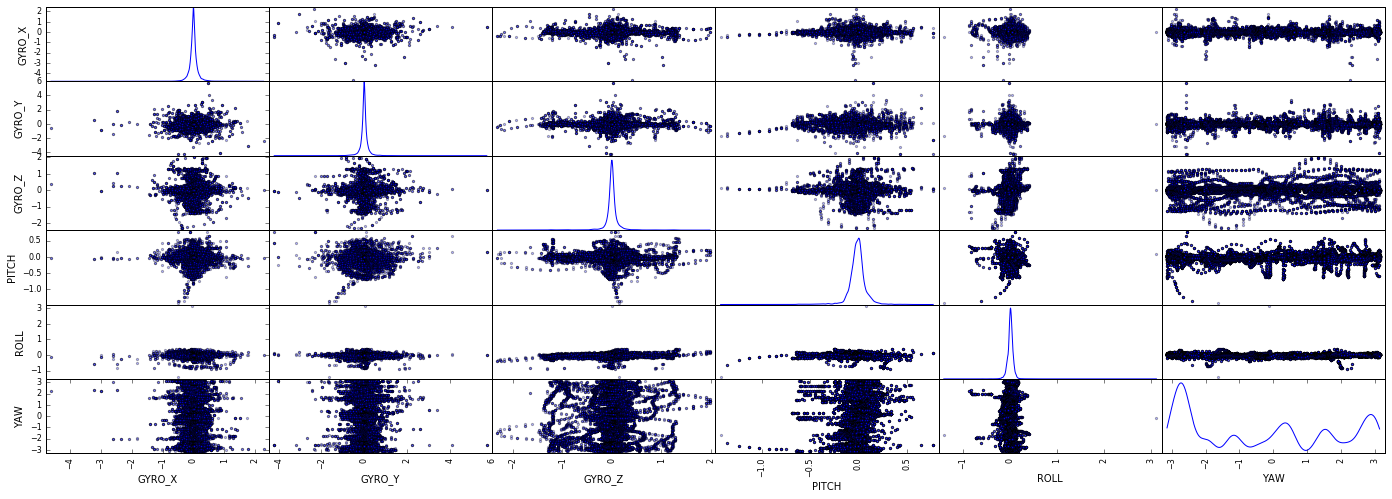

In [12]:
pd.scatter_matrix(all_data[all_data.keys()[11:-4]], alpha = 0.3, figsize = (24,8), diagonal = 'kde');

## Explore particular log id

In [34]:
def show_data_from_logid(log_id, features, time_interval=1.0):
    logid_data = all_data[all_data['LOG_ID'] == log_id]
    
    # process values shifting if necessary
    tmp_features = []
    for item in features:
        if type(item) is tuple:
            feature_name = item[0]
            if len(item) == 3:
                rate = item[2] # scale value
                logid_data[feature_name] = logid_data[feature_name] * rate
            value_shift = item[1] # shift value
            logid_data[feature_name] = logid_data[feature_name] + value_shift                
            tmp_features.append(feature_name)
        else:
            tmp_features.append(item)
    features = tmp_features
        
    # scale time to seconds
    logid_data['TIME'] = logid_data['TIME'] / (0.5e+6)
    
    # prepare x sticks
    x_stick = np.arange(logid_data['TIME'].min(), logid_data['TIME'].max(), time_interval)
    x_stick = pd.DataFrame(x_stick, columns = ['Time'])
    
    # plot data
    fig, ax = plt.subplots(figsize = (14,8))
    logid_data.plot(x = 'TIME', y = features, 
                  xticks=x_stick['Time'], kind = 'line', ax=ax, rot=70);

In [ ]:
show_data_from_logid(0, )

C:\Users\sholc2005\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sholc2005\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sholc2005\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

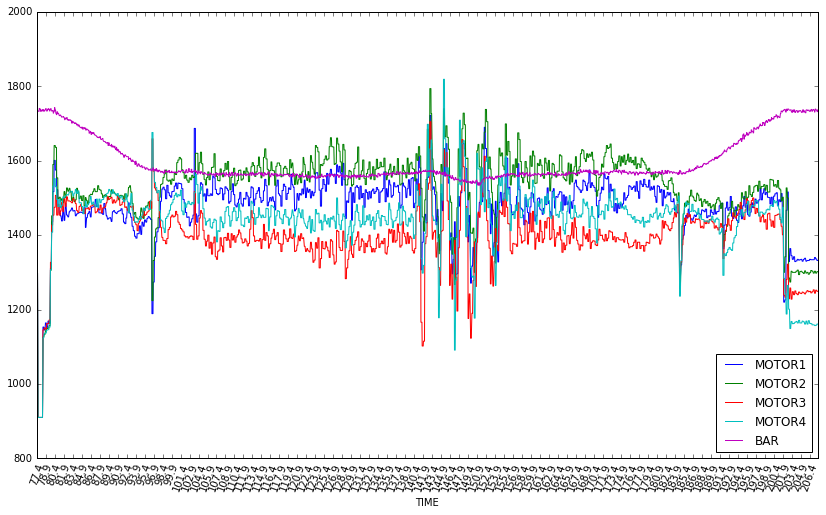

In [47]:
features2use = ['MOTOR1', 'MOTOR2', 'MOTOR3', 'MOTOR4', ('BAR', -100.2e+3, 100.0)]
show_data_from_logid(1,features2use, 1.5)

C:\Users\sholc2005\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


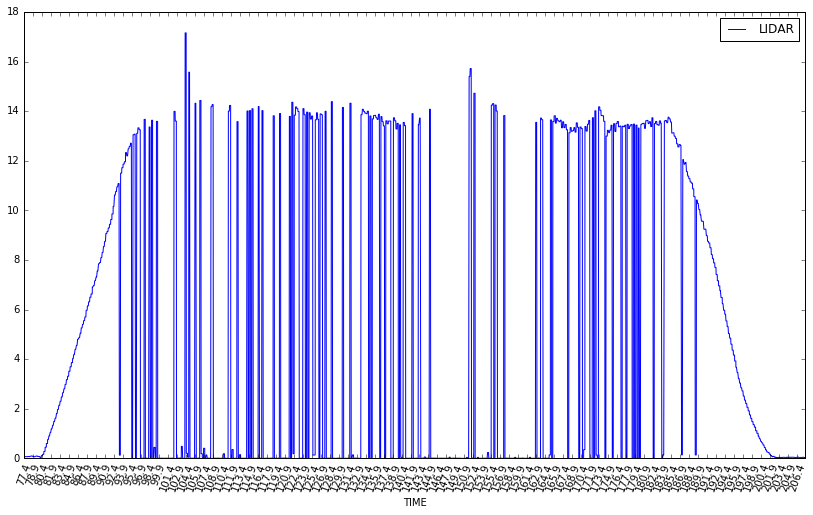

In [10]:
features2use = ['LIDAR']
show_data_from_logid(1,features2use, 1.5)

C:\Users\sholc2005\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


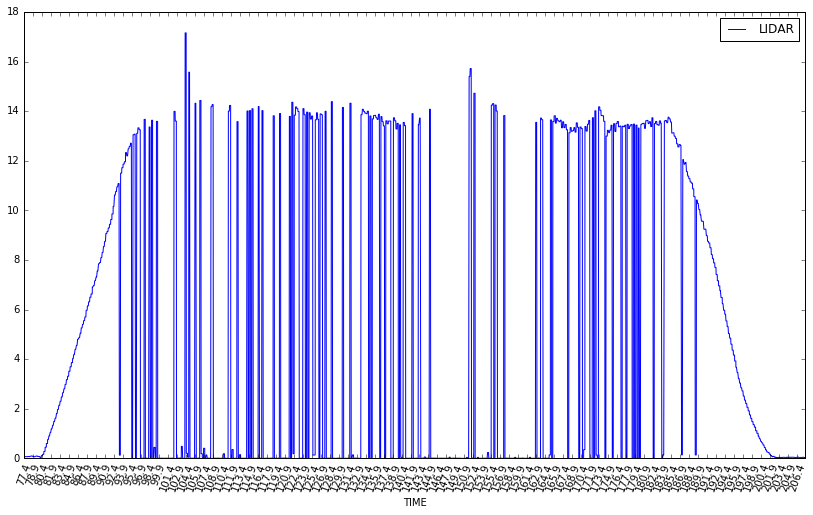

In [40]:
features2use = ['LIDAR']
show_data_from_logid(1,features2use, 1.5)

C:\Users\sholc2005\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sholc2005\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


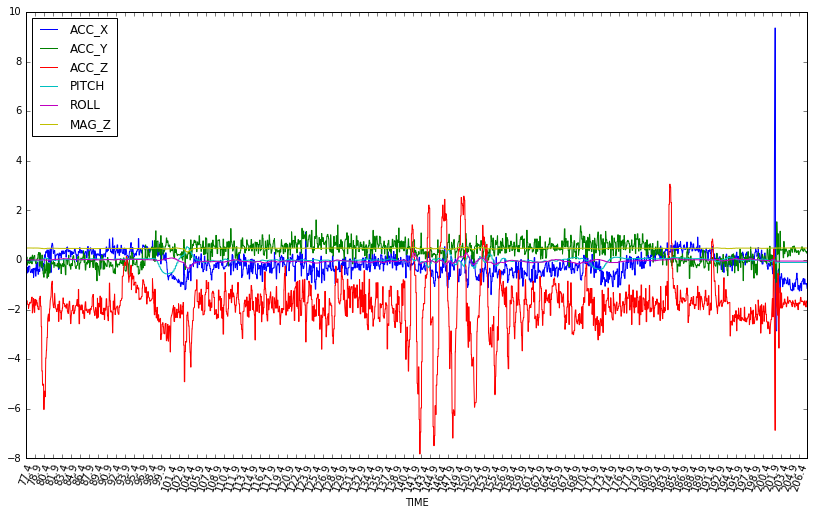

In [20]:
features2use = ['ACC_X','ACC_Y', ('ACC_Z', 8.0), 'PITCH', 'ROLL', 'MAG_Z']
show_data_from_logid(1, features2use, 1.5)

C:\Users\sholc2005\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


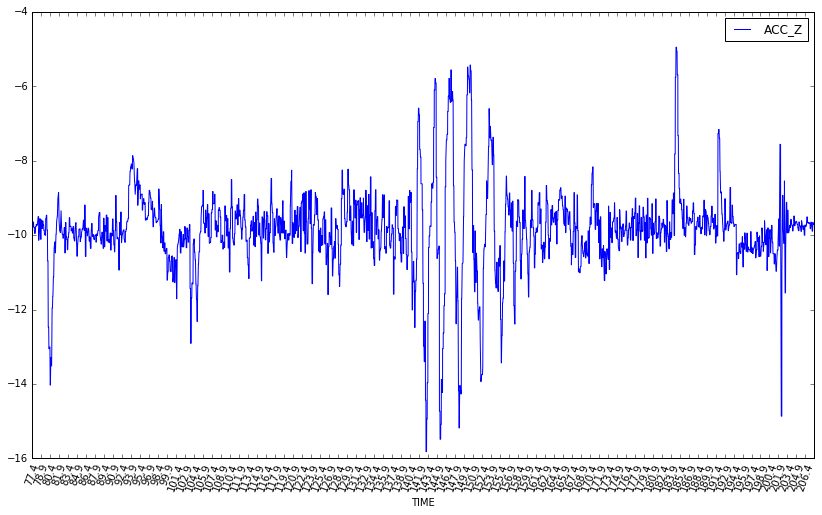

In [14]:
features2use = ['ACC_Z']
show_data_from_logid(1, features2use, 1.5)

In [33]:
from sklearn import preprocessing
small_bias = 0.00000
g = 9.80665
features2use = ['MOTOR1', 'MOTOR2', 'MOTOR3', 'MOTOR4', 'THRUST', \
                'ACC_X','ACC_Y','ACC_Z', 'MAG_Z', 'PITCH', 'ROLL']

min_vals = {'MOTOR1': 900, 'MOTOR2': 900, 'MOTOR3': 900, 'MOTOR4': 900, 
            'THRUST': 1.0 + small_bias, 
            'ACC_X': 8.0 * g + small_bias, 'ACC_Y': 8.0 * g + small_bias, 'ACC_Z': 8.0 * g + small_bias,
            'MAG_Z': 1.3 + small_bias,
            'PITCH': np.pi + small_bias, 'ROLL': np.pi + small_bias, 'YAW': np.pi + small_bias
            }

max_vals = {'MOTOR1': 1890, 'MOTOR2': 1890, 'MOTOR3': 1890, 'MOTOR4': 1890,
            'THRUST': 1.0 + min_vals['THRUST'],
            'ACC_X': 8.0 * g + min_vals['ACC_X'], 'ACC_Y': 8.0 * g + min_vals['ACC_Y'], 'ACC_Z': 8.0 * g + min_vals['ACC_Z'],
            'MAG_Z': 1.3 + min_vals['MAG_Z'],
            'PITCH': np.pi + min_vals['PITCH'], 'ROLL': np.pi + min_vals['ROLL'], 'YAW': np.pi + min_vals['YAW']}

def make_positive(data_filtered):
    # make all data positive
    
    data_scaled = data_filtered.copy()

    for key in data_scaled.keys():
        # care about negative values
        if key in features2use:
            if key not in ['MOTOR1', 'MOTOR2', 'MOTOR3', 'MOTOR4']:
                data_scaled[key] = data_scaled[key] + min_vals[key]
        else:
            min_val = data_scaled[key].min()
            if min_val <= 0.0:
                data_scaled[key] = data_scaled[key] + min_val + small_bias

    return data_scaled

def scale(data, min_=0.0, max_=255.0):
    # scale data for particular range
    # data previously applyied log function
    
    scaled = data.copy()
    
    for key in scaled.keys():
        if key in features2use:
            scaled[key] = ((max_ - min_) / (data[key].max() - data[key].min())) * (scaled[key] -  data[key].min()) + min_
        
    return scaled

In [34]:
data_filtered = all_data[features2use]
data_positive = make_positive(data_filtered)
data_scaled = scale(data_positive)

In [35]:
display(data_positive.describe())
display(data_scaled.describe())

,MOTOR1,MOTOR2,MOTOR3,MOTOR4,THRUST,ACC_X,ACC_Y,ACC_Z,MAG_Z,PITCH,ROLL
count,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000
mean,1466.297852,1510.501919,1441.252009,1476.069797,1.536727,78.388910,78.388942,68.651312,1.781749,3.129401,3.148578
std,97.354726,100.372674,99.776605,99.053814,0.105075,0.658954,0.527975,1.357033,0.020826,0.094939,0.066477
min,910.000000,910.000000,910.000000,910.000000,1.000000,57.528275,70.807159,30.760005,0.780630,1.717451,1.730067
25%,1434.000000,1480.000000,1406.000000,1445.000000,1.509179,78.074852,78.092560,68.299778,1.772462,3.093987,3.122127
50%,1477.000000,1517.000000,1450.000000,1483.000000,1.546479,78.396069,78.355883,68.678271,1.784339,3.133144,3.151793
75%,1514.000000,1559.000000,1492.000000,1526.000000,1.585419,78.688465,78.644223,69.070576,1.794051,3.169319,3.181318
max,1879.000000,1879.000000,1819.000000,1878.000000,2.000000,95.303137,93.600830,88.268961,1.860690,3.913941,6.261976


,MOTOR1,MOTOR2,MOTOR3,MOTOR4,THRUST,ACC_X,ACC_Y,ACC_Z,MAG_Z,PITCH,ROLL
count,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000,88084.000000
mean,146.394172,158.026821,149.031092,149.119626,136.865426,140.820156,84.819806,168.013542,236.362238,163.919346,79.816341
std,25.619665,26.413861,27.990137,26.093722,26.794081,4.448280,5.906627,6.017210,4.916946,11.021920,3.740517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,137.894737,150.000000,139.141914,140.934917,129.840705,138.700096,81.504088,166.454808,234.169632,159.808023,78.327992
50%,149.210526,159.736842,151.485149,150.945248,139.352126,140.868477,84.449967,168.133080,236.973705,164.353952,79.997238
75%,158.947368,170.789474,163.267327,162.272727,149.281890,142.842303,87.675719,169.872598,239.266853,168.553593,81.658526
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [29]:
from sklearn import cross_validation
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1)
scores = cross_validation.cross_val_score(clf, data_scaled, all_data['LAND_STATUS'], cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.00)


In [38]:
learn_data = all_data[(all_data['LOG_ID'] >= 0) & (all_data['LOG_ID'] <12) & (all_data['STATUS'] == 'land')]
print "Learning data size {:d}".format(learn_data.shape[0])
test_data = all_data[(all_data['LOG_ID'] >= 12) & (all_data['STATUS'] == 'land')]
print "Testing data size {:d}".format(test_data.shape[0])



Learning data size 12773
Testing data size 13721


In [45]:
def add_onland_label(data):
    dataset = data.copy().reset_index()
    set_label = False
    prev_time = None
    prev_log_id = None
    for i in range(0, dataset.shape[0]):
        if prev_time is None:
            prev_time = dataset.at[i, 'TIME']
            prev_log_id = dataset.at[i, 'LOG_ID']
            continue
            
        if dataset.at[i, 'LAND_STATUS'] == 1.0 and prev_log_id == dataset.at[i, 'LOG_ID']:
            set_label = True
            prev_time = dataset.at[i, 'TIME']
            prev_log_id = dataset.at[i, 'LOG_ID']
            continue
        elif prev_log_id != dataset.at[i, 'LOG_ID']:
            set_label = False
            prev_time = dataset.at[i, 'TIME']
            prev_log_id = dataset.at[i, 'LOG_ID']
            continue
            
        if (dataset.at[i, 'TIME'] - prev_time <= 1.0e+6) and prev_log_id == dataset.at[i, 'LOG_ID']:
            if set_label:
                dataset.at[i, 'LAND_STATUS'] = 2.0
        else:
            set_label = False
            
        prev_time = dataset.at[i, 'TIME']
        prev_log_id = dataset.at[i, 'LOG_ID']

    return dataset

In [46]:
all_data2 = add_onland_label(all_data)

In [77]:
all_data_tmp = all_data2[(all_data2['LOG_ID'] == 17) & (all_data2['STATUS'] =='land')]

In [82]:
print all_data_tmp.iloc[[0, 1]]

       index          BAR  MOTOR1  MOTOR2  MOTOR3  MOTOR4     LIDAR    THRUST  \
52048  52048  1018.529968    1397    1454    1465    1497  7.788001  0.252102   
52049  52049  1018.479980    1267    1334    1189    1258  7.788001  0.252102   

          ACC_X     ACC_Y   ...      GYRO_X    GYRO_Y    GYRO_Z     PITCH  \
52048 -0.239145 -0.285976   ...    0.057516 -0.040337 -0.154261 -0.013261   
52049 -0.001460 -0.399132   ...    0.114691 -0.072300 -0.124732 -0.015425   

           ROLL       YAW      TIME  LOG_ID  LAND_STATUS  STATUS  
52048  0.011752  3.065102  61096795      17            0    land  
52049  0.016748  3.050015  61148559      17            0    land  

[2 rows x 22 columns]


In [63]:
pd.options.display.max_rows = 1999
#print all_data_tmp[['TIME', 'LAND_STATUS', 'STATUS', 'LOG_ID']]

from sklearn.cross_validation import ShuffleSplit
lkf = ShuffleSplit(100, n_iter=10, test_size=10, train_size=4)
for train, test in lkf:
    print "Train", train
    print "Test", test

Train [44 10 31 76]
Test [ 4 30 14  0  3 24 19 38 13 54]
Train [57 36 22 24]
Test [85 43 73 74 94 84 78 75 95 19]
Train [98 93  3 96]
Test [34 50 80 88 27 58 84 47 62 19]
Train [61 91 98 24]
Test [86 93 17  2 74 15 39 26 72 12]
Train [25 93  8 31]
Test [49 59 16 50 99 40 75 58 78  2]
Train [45 67 35 71]
Test [19 88 29 53  5 75 94 37 97 76]
Train [16  5 90 20]
Test [30 55 34 44 88 79 19 28 59 98]
Train [43 13 28 69]
Test [44 87 35  2 94 19 26 99 68 75]
Train [99 82  4 34]
Test [73 77 94 90 49 69 70  0  9 37]
Train [84 79 74 47]
Test [71 20 25 68 39 57 51  1 19 33]
